In [1]:
import json, os
import pandas as pd

paths = os.path.abspath(os.getcwd()) + r"/data"
dir_list = os.listdir(paths)
# print(dir_list)
segments = []
time_map = {
    2: '00:00', 3: '01:00', 4: '02:00', 5: '03:00', 6: '04:00',
    7: '05:00', 8: '06:00', 9: '07:00', 10: '08:00', 11: '09:00',
    12: '10:00', 13: '11:00', 14: '12:00', 15: '13:00', 16: '14:00',
    17: '15:00', 18: '16:00', 19: '17:00', 20: '18:00', 21: '19:00',
    22: '20:00', 23: '21:00', 24: '22:00', 25: '23:00'
}

for file_name in dir_list:
    with open(paths + "/" + file_name) as f:
        data = json.load(f)
        for segment in data["network"]["segmentResults"]:
            for result in segment["segmentTimeResults"]:
                segments.append(
                    {
                        "timeSet": pd.to_datetime(time_map[result["timeSet"]], format='%H:%M').hour,
                        "dateRange": result["dateRange"],
                        "harmonicAverageSpeed": result["dateRange"],
                        "medianSpeed": result["medianSpeed"],
                        "averageSpeed": result["averageSpeed"],
                        "standardDeviationSpeed": result["standardDeviationSpeed"],
                        "travelTimeStandardDeviation": result[
                            "travelTimeStandardDeviation"
                        ],
                        "sampleSize": result["sampleSize"],
                        "averageTravelTime": result["averageTravelTime"],
                        "medianTravelTime": result["medianTravelTime"],
                        "travelTimeRatio": result["travelTimeRatio"],
                        "speedPercentiles_25": result["speedPercentiles"][4],
                        "speedPercentiles_50": result["speedPercentiles"][9],
                        "speedPercentiles_75": result["speedPercentiles"][14],
                        "speedPercentiles_95": result["speedPercentiles"][18],
                    }
                )

print(segments)

[{'timeSet': 0, 'dateRange': 1, 'harmonicAverageSpeed': 1, 'medianSpeed': 23.0, 'averageSpeed': 22.3, 'standardDeviationSpeed': 8.5, 'travelTimeStandardDeviation': 8.08, 'sampleSize': 1740, 'averageTravelTime': 2.17, 'medianTravelTime': 1.42, 'travelTimeRatio': 1.0, 'speedPercentiles_25': 17, 'speedPercentiles_50': 23, 'speedPercentiles_75': 28, 'speedPercentiles_95': 35}, {'timeSet': 1, 'dateRange': 1, 'harmonicAverageSpeed': 1, 'medianSpeed': 25.5, 'averageSpeed': 24.8, 'standardDeviationSpeed': 8.1, 'travelTimeStandardDeviation': 1.61, 'sampleSize': 1809, 'averageTravelTime': 1.64, 'medianTravelTime': 1.28, 'travelTimeRatio': 0.76, 'speedPercentiles_25': 21, 'speedPercentiles_50': 26, 'speedPercentiles_75': 30, 'speedPercentiles_95': 37}, {'timeSet': 2, 'dateRange': 1, 'harmonicAverageSpeed': 1, 'medianSpeed': 26.5, 'averageSpeed': 25.7, 'standardDeviationSpeed': 8.0, 'travelTimeStandardDeviation': 1.42, 'sampleSize': 1665, 'averageTravelTime': 1.56, 'medianTravelTime': 1.23, 'trave

In [2]:
# Create DataFrame
df = pd.DataFrame(segments)

# Define features and target
df.head(10)

,timeSet,dateRange,harmonicAverageSpeed,medianSpeed,averageSpeed,standardDeviationSpeed,travelTimeStandardDeviation,sampleSize,averageTravelTime,medianTravelTime,travelTimeRatio,speedPercentiles_25,speedPercentiles_50,speedPercentiles_75,speedPercentiles_95
0,0,1,1,23.0,22.3,8.5,8.08,1740,2.17,1.42,1.00,17,23,28,35
1,1,1,1,25.5,24.8,8.1,1.61,1809,1.64,1.28,0.76,21,26,30,37
2,2,1,1,26.5,25.7,8.0,1.42,1665,1.56,1.23,0.72,21,27,31,38
3,3,1,1,27.3,26.5,8.3,2.36,1633,1.59,1.20,0.73,22,27,32,39
4,4,1,1,27.2,26.4,8.9,2.35,1521,1.66,1.20,0.76,22,27,32,39
5,5,1,1,26.9,26.1,8.7,1.69,1420,1.60,1.22,0.74,21,27,32,39
6,6,1,1,22.5,22.4,9.7,3.16,1421,2.22,1.45,1.02,16,23,29,39
7,7,1,1,21.1,20.3,10.5,4.39,812,2.97,1.55,1.37,11,21,28,37
8,8,1,1,17.6,17.6,10.5,6.76,964,3.65,1.86,1.68,9,18,25,33
9,9,1,1,17.7,17.9,10.4,4.68,956,3.49,1.85,1.61,9,18,25,34


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timeSet,888.0,11.500000,6.926087,0.00,5.75,11.500,17.2500,23.00
dateRange,888.0,1.000000,0.000000,1.00,1.00,1.000,1.0000,1.00
harmonicAverageSpeed,888.0,1.000000,0.000000,1.00,1.00,1.000,1.0000,1.00
medianSpeed,888.0,20.940428,5.214324,4.40,18.50,21.400,24.2250,29.70
averageSpeed,888.0,20.860360,4.469100,7.40,18.70,21.000,23.7000,29.20
standardDeviationSpeed,888.0,9.106757,0.856133,6.80,8.60,9.100,9.7000,11.60
travelTimeStandardDeviation,888.0,6.587534,5.430923,0.49,2.92,4.905,8.1775,43.41
sampleSize,888.0,1567.831081,911.780536,173.00,981.75,1339.500,1848.7500,5048.00
averageTravelTime,888.0,5.488773,6.393538,0.80,2.38,3.390,5.1650,43.45
medianTravelTime,888.0,3.674899,5.349782,0.67,1.63,2.200,3.3825,41.29


In [5]:
#Check any missing value exist
df.isna().sum()

timeSet                        0
dateRange                      0
harmonicAverageSpeed           0
medianSpeed                    0
averageSpeed                   0
standardDeviationSpeed         0
travelTimeStandardDeviation    0
sampleSize                     0
averageTravelTime              0
medianTravelTime               0
travelTimeRatio                0
speedPercentiles_25            0
speedPercentiles_50            0
speedPercentiles_75            0
speedPercentiles_95            0
dtype: int64

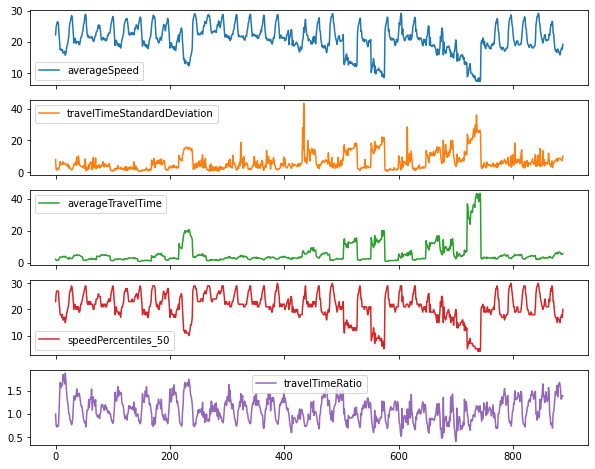

In [6]:
df_series_gp = df[['averageSpeed','travelTimeStandardDeviation','averageTravelTime','speedPercentiles_50','travelTimeRatio']]
_ = df_series_gp.plot(subplots=True, figsize=(10,8))

### Preprocessing Part

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   timeSet                      888 non-null    int64  
 1   dateRange                    888 non-null    int64  
 2   harmonicAverageSpeed         888 non-null    int64  
 3   medianSpeed                  888 non-null    float64
 4   averageSpeed                 888 non-null    float64
 5   standardDeviationSpeed       888 non-null    float64
 6   travelTimeStandardDeviation  888 non-null    float64
 7   sampleSize                   888 non-null    int64  
 8   averageTravelTime            888 non-null    float64
 9   medianTravelTime             888 non-null    float64
 10  travelTimeRatio              888 non-null    float64
 11  speedPercentiles_25          888 non-null    int64  
 12  speedPercentiles_50          888 non-null    int64  
 13  speedPercentiles_75 

In [8]:
df["harmonicAverageSpeed"].unique()

array([1], dtype=int64)

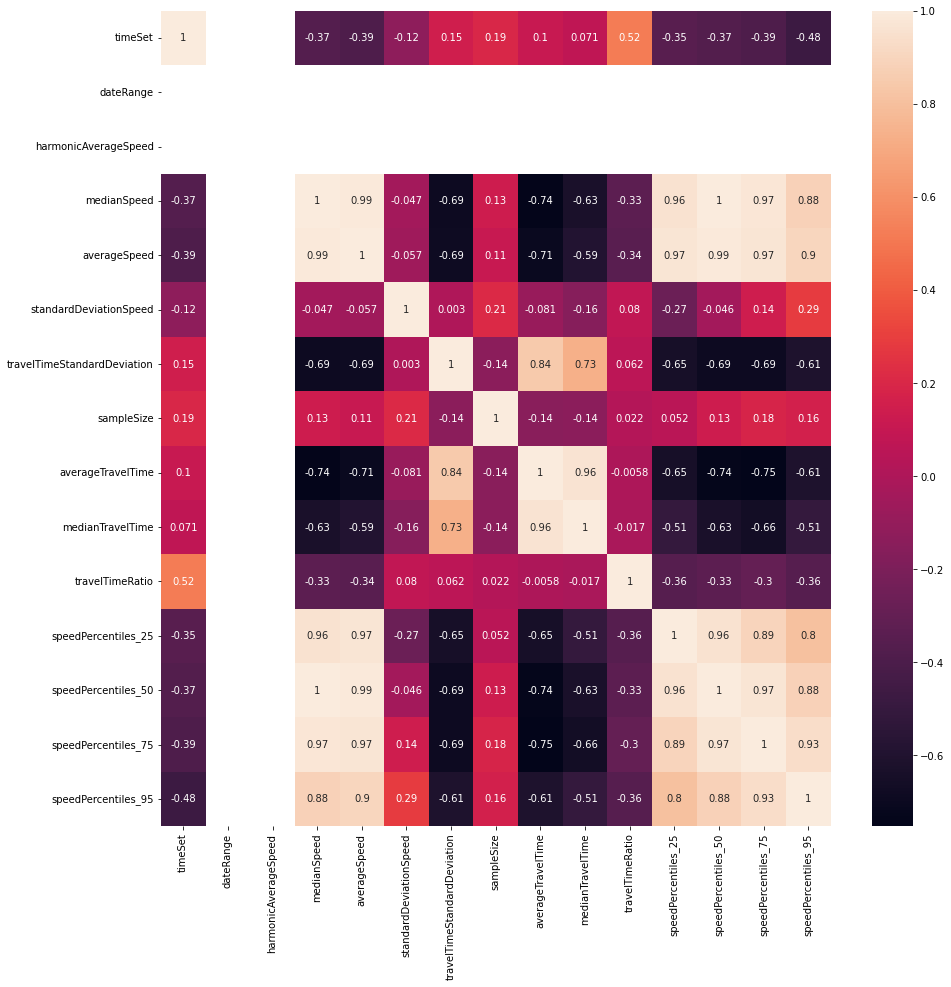

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Correlation Analysis

correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [10]:
import numpy as np

df['hour_sin'] = np.sin(df['timeSet'] * 2 * np.pi / 24)
df['hour_cos'] = np.cos(df['timeSet'] * 2 * np.pi / 24)

In [11]:
time_sets = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23]
results = {}

# use IQR to mapping sampleSize as three different label 
# 1 = low, 2 = average, 3 =  high volume
for time_set in time_sets:
    quantiles = df.loc[df["timeSet"] == time_set, ["sampleSize"]].quantile(
        [0.25, 0.5, 0.75], method="table", interpolation="nearest"
    )['sampleSize'].to_list()
    
    results[time_set] = quantiles


for _ in time_sets:
    df.loc[(df["timeSet"]==_) & (df["sampleSize"] < results[_][0]), 'sampleSize'] = 1
    df.loc[(df["timeSet"]==_) & (df["sampleSize"] >= results[_][0]) & (df["sampleSize"] <= results[_][2]), 'sampleSize'] = 2
    df.loc[(df["timeSet"]==_) & (df["sampleSize"] > results[_][2]), 'sampleSize'] = 3


df = pd.get_dummies(df, columns=["sampleSize"], dtype="float")


In [13]:

# drop some data which is not useful
df.drop(
    [
        "dateRange",
        "harmonicAverageSpeed",
        'timeSet',
    ],
    axis=1,
    inplace=True,
)

In [14]:
df

,medianSpeed,averageSpeed,standardDeviationSpeed,travelTimeStandardDeviation,averageTravelTime,medianTravelTime,travelTimeRatio,speedPercentiles_25,speedPercentiles_50,speedPercentiles_75,speedPercentiles_95,hour_sin,hour_cos,sampleSize_1,sampleSize_2,sampleSize_3
0,23.0,22.3,8.5,8.08,2.17,1.42,1.00,17,23,28,35,0.000000,1.000000,0.0,1.0,0.0
1,25.5,24.8,8.1,1.61,1.64,1.28,0.76,21,26,30,37,0.258819,0.965926,0.0,1.0,0.0
2,26.5,25.7,8.0,1.42,1.56,1.23,0.72,21,27,31,38,0.500000,0.866025,0.0,1.0,0.0
3,27.3,26.5,8.3,2.36,1.59,1.20,0.73,22,27,32,39,0.707107,0.707107,0.0,1.0,0.0
4,27.2,26.4,8.9,2.35,1.66,1.20,0.76,22,27,32,39,0.866025,0.500000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,16.6,16.8,9.4,8.42,6.15,3.20,1.54,9,17,23,32,-0.965926,0.258819,0.0,0.0,1.0
884,17.3,17.7,9.3,8.17,5.26,3.07,1.32,11,17,24,33,-0.866025,0.500000,0.0,0.0,1.0
885,17.8,18.1,9.9,7.11,5.34,2.99,1.34,10,18,25,34,-0.707107,0.707107,0.0,0.0,1.0
886,17.3,17.7,10.0,7.93,5.61,3.07,1.40,10,17,25,34,-0.500000,0.866025,0.0,0.0,1.0


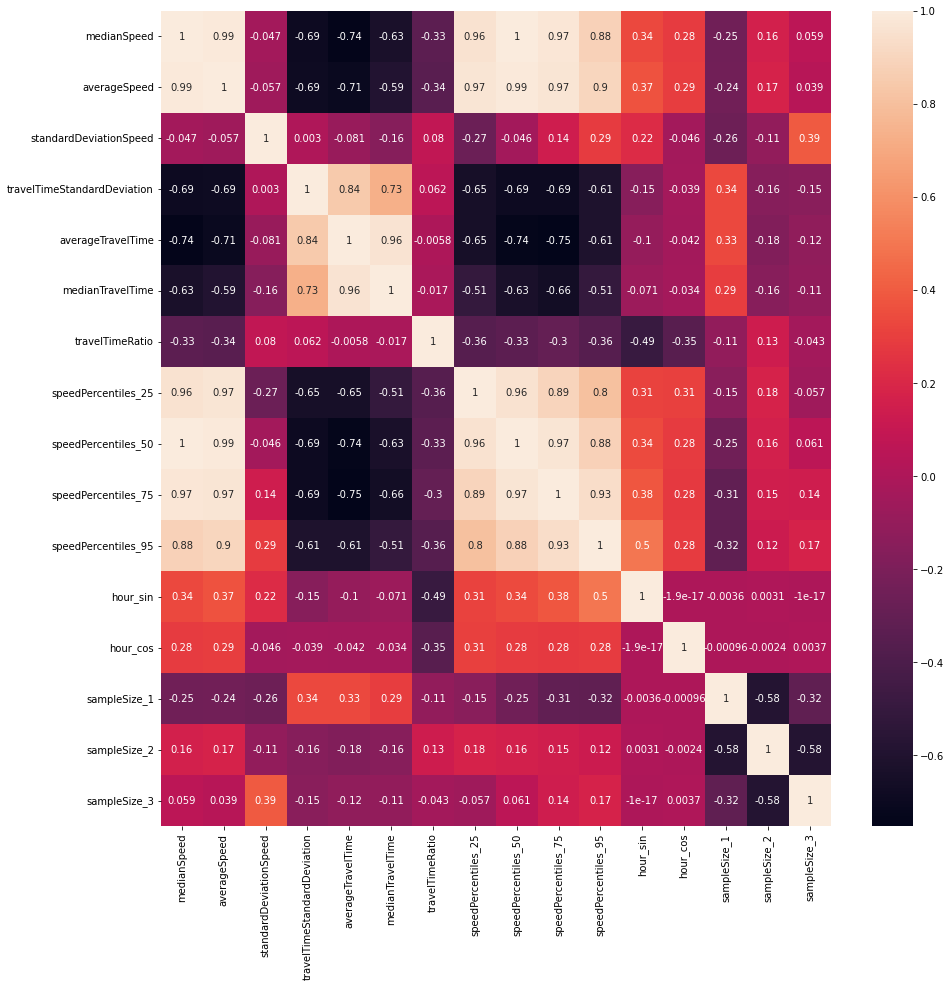

In [15]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


train = df[:680]
test = df[680:]


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_train = pd.DataFrame(scaler.fit_transform(train), columns=df.columns)
scaled_data_test = pd.DataFrame(scaler.fit_transform(test), columns=df.columns)


x_train = scaled_data_train[list(scaled_data_train.drop('travelTimeRatio', axis=1).columns)]
y_train = scaled_data_train['travelTimeRatio']

x_test = scaled_data_test[list(scaled_data_test.drop('travelTimeRatio', axis=1).columns)]
y_test = scaled_data_test['travelTimeRatio']


look_back = 30
generator = TimeseriesGenerator(x_train, y_train, length=look_back, batch_size=1)

dummy_targets = np.zeros((x_test.shape[0], 1))
generator_test = TimeseriesGenerator(x_test, dummy_targets, length=look_back, batch_size=1)

Validation_generator = TimeseriesGenerator(
    x_test, y_test, length=look_back, batch_size=1
)

x_train

,medianSpeed,averageSpeed,standardDeviationSpeed,travelTimeStandardDeviation,averageTravelTime,medianTravelTime,speedPercentiles_25,speedPercentiles_50,speedPercentiles_75,speedPercentiles_95,hour_sin,hour_cos,sampleSize_1,sampleSize_2,sampleSize_3
0,0.724280,0.665049,0.355556,0.176841,0.068261,0.051300,0.652174,0.72,0.666667,0.555556,0.500000,1.000000,0.0,1.0,0.0
1,0.827160,0.786408,0.266667,0.026095,0.041854,0.041724,0.826087,0.84,0.761905,0.666667,0.629410,0.982963,0.0,1.0,0.0
2,0.868313,0.830097,0.244444,0.021668,0.037867,0.038304,0.826087,0.88,0.809524,0.722222,0.750000,0.933013,0.0,1.0,0.0
3,0.901235,0.868932,0.311111,0.043569,0.039362,0.036252,0.869565,0.88,0.857143,0.777778,0.853553,0.853553,0.0,1.0,0.0
4,0.897119,0.864078,0.444444,0.043336,0.042850,0.036252,0.869565,0.88,0.857143,0.777778,0.933013,0.750000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,0.810700,0.728155,0.466667,0.120690,0.214250,0.185363,0.739130,0.80,0.714286,0.666667,0.853553,0.853553,1.0,0.0,0.0
676,0.802469,0.771845,0.688889,0.138630,0.210762,0.187415,0.739130,0.80,0.761905,0.777778,0.933013,0.750000,1.0,0.0,0.0
677,0.736626,0.699029,0.644444,0.125815,0.228201,0.203830,0.652174,0.72,0.714286,0.722222,0.982963,0.629410,0.0,1.0,0.0
678,0.411523,0.354369,0.933333,0.458527,0.676134,0.331737,0.173913,0.40,0.476190,0.500000,1.000000,0.500000,1.0,0.0,0.0


In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   medianSpeed                  680 non-null    float64
 1   averageSpeed                 680 non-null    float64
 2   standardDeviationSpeed       680 non-null    float64
 3   travelTimeStandardDeviation  680 non-null    float64
 4   averageTravelTime            680 non-null    float64
 5   medianTravelTime             680 non-null    float64
 6   speedPercentiles_25          680 non-null    float64
 7   speedPercentiles_50          680 non-null    float64
 8   speedPercentiles_75          680 non-null    float64
 9   speedPercentiles_95          680 non-null    float64
 10  hour_sin                     680 non-null    float64
 11  hour_cos                     680 non-null    float64
 12  sampleSize_1                 680 non-null    float64
 13  sampleSize_2        

In [19]:
generator[3][0].shape

(1, 48, 15)

In [20]:
x_train.shape, y_train.shape

((680, 15), (680,))

### Model implementation

In [27]:
import torch
import tensorflow as tf

# torch.cuda.set_device(0)  # Set to your desired GPU number

# print("Num GPUs Available: ", len(tf.config.list_physical_devices("CPU")))
# torch.cuda.get_device_name(0)

In [22]:
from tensorflow.python.client import device_lib


def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]


print(get_available_devices())

['/device:CPU:0']


### LSTM Model training

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Create a model with the normalization layer, LSTM, and softmax
# no need to set input shape cuz TimeseriesGenerator will enter the input shape


def create_fit_LTSM_model(model_nl=128,dropout=0.2,epochs = 100,activation_method='relu',optimizer_method='Adam',gen=None):
    model = Sequential([
        LSTM(model_nl, activation=activation_method,return_sequences=True),
        Dropout(dropout),
        LSTM(model_nl,activation=activation_method, return_sequences=False),
        Dropout(dropout),
        Dense(model_nl,activation=activation_method),
        Dense(model_nl,activation=activation_method), 
        Dense(1)
    ])

    # Compile the model with a custom setting
    model.compile(
        optimizer=optimizer_method,
        loss='mean_squared_error',
        metrics=['mse']  
    )

    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Reduce learning rate when a metric has stopped improving
    lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

    # Train the model with early stopping and learning rate reduction
    history = model.fit(
        gen,
        epochs=epochs,
        validation_data=gen,
        callbacks=[early_stop, lr_reduce]
        
    )
    result = []
    test_results = model.evaluate(gen)
    result.append([test_results[0],model_nl,dropout,epochs,activation_method,optimizer_method])

    return result, model

In [88]:
# test train first LSTM model to see the result
LSTM_model_result, LSTM_model = create_fit_LTSM_model(epochs=100, gen=generator)
LSTM_model.summary()

Epoch 1/100
 19/632 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1931 - mse: 0.1931 

c:\Users\ryan2\.conda\envs\py3_10\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


632/632 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.0122 - val_mse: 0.0122 - learning_rate: 0.0010
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0106 - val_mse: 0.0106 - learning_rate: 0.0010
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0127 - val_mse: 0.0127 - learning_rate: 0.0010
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0131 - val_mse: 0.0131 - learning_rate: 0.0010
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0079 - val_mse: 0.0079 - learning_rate: 0.0010
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0075 - val_mse: 0.0075 - learning_rate: 0.0010
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0144 - val_mse: 0.0144 - learning_rate: 0.0010
Epo

Model: "sequential_124"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_240 (LSTM)                 │ (None, 48, 128)        │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_248 (Dropout)           │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_241 (LSTM)                 │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_249 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_372 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_373 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_374 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 715,397 (2.73 MB)

 Trainable params: 238,465 (931.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 476,932 (1.82 MB)

In [89]:
LSTM_model_result

[[0.0033365057315677404, 128, 0.2, 100, 'relu', 'Adam']]

In [90]:
# Calculate MAE for validation
predictions = LSTM_model.predict(generator_test)

predictions = pd.DataFrame(predictions).rename(columns={0: 'Prediction'})
y = y_test[look_back:]
y.index = range(len(y.index))
final = pd.concat([predictions,y],axis=1)
final['mae'] = abs(final['Prediction'] - final['travelTimeRatio'])
final['mae'].mean()

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.22232898868415063

### GRU Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def create_fit_gru_model(
    model_nl=128,
    dropout=0.2,
    epochs=100,
    activation_method="relu",
    optimizer_method="Adam",
    gen=None,
):
    model = Sequential(
        [
            GRU(model_nl, return_sequences=True, activation=activation_method),
            Dropout(dropout),
            GRU(model_nl, activation=activation_method),
            Dropout(dropout),
            Dense(model_nl, activation=activation_method),
            Dense(1),
        ]
    )

    model.compile(
        optimizer=optimizer_method, loss="mean_squared_error", metrics=["mse"]
    )

    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    )

    # Reduce learning rate when a metric has stopped improving
    lr_reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5)

    # Train the model with early stopping and learning rate reduction
    history = model.fit(
        gen, epochs=epochs, validation_data=gen, callbacks=[early_stop, lr_reduce]
    )
    result = []
    test_results = model.evaluate(gen)
    result.append([test_results[0],model_nl,dropout,epochs,activation_method,optimizer_method])

    return result, model

In [92]:
# test train first GRU model to see the result
GRU_model_result, GRU_model = create_fit_gru_model(epochs=100, gen=generator)
GRU_model.summary()

Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0122 - val_mse: 0.0122 - learning_rate: 0.0010
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0125 - val_mse: 0.0125 - learning_rate: 0.0010
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0120 - val_mse: 0.0120 - learning_rate: 0.0010
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0099 - val_mse: 0.0099 - learning_rate: 0.0010
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0077 - val_mse: 0.0077 - learning_rate: 0.0010
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0074 - val_mse: 0.0074 - learning_rate: 0.0010
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0070 - val_mse: 0.0070 - learning_rate

Model: "sequential_125"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 48, 128)        │        55,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_250 (Dropout)           │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_251 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_375 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_376 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,181 (1.96 MB)

 Trainable params: 171,393 (669.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 342,788 (1.31 MB)

In [93]:
GRU_model_result

[[0.0033500997815281153, 128, 0.2, 100, 'relu', 'Adam']]

### Dense Model

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer


def create_fit_dense_model(
    model_nl=[256,128,64],
    dropout=0.2,
    epochs=100,
    activation_method="relu",
    optimizer_method="Adam",
    gen=None,
    input_shape= None
):
    model = Sequential(
        [
            Dense(model_nl[0], activation=activation_method, input_shape=input_shape),
            Dropout(dropout),
            Dense(model_nl[1], activation=activation_method),
            Dropout(dropout),
            Dense(model_nl[2], activation=activation_method),
            Dense(1),  # Output layer
        ]
    )

    model.compile(
        optimizer=optimizer_method, loss="mean_squared_error", metrics=["mse"]
    )

    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    )

    # Reduce learning rate when a metric has stopped improving
    lr_reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5)

    # Train the model with early stopping and learning rate reduction
    history = model.fit(
        gen, epochs=epochs, validation_data=gen, callbacks=[early_stop, lr_reduce]
    )
    result = []
    test_results = model.evaluate(gen)
    result.append(
        [
            test_results[0],
            model_nl,
            dropout,
            epochs,
            activation_method,
            optimizer_method,
        ]
    )

    return result, model

In [95]:
# test train first GRU model to see the result
Dense_model_result, Dense_model = create_fit_dense_model(epochs=100, gen=generator)
Dense_model.summary()

Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0271 - val_mse: 0.0271 - learning_rate: 0.0010
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0267 - val_mse: 0.0267 - learning_rate: 0.0010
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.0279 - val_mse: 0.0279 - learning_rate: 0.0010
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0275 - val_mse: 0.0275 - learning_rate: 0.0010
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0290 - val_mse: 0.0290 - learning_rate: 0.0010
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0266 - val_mse: 0.0266 - learning_rate: 0.0010
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0273 - val_mse: 0.0273 - learning_rate: 0.0010

Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_377 (Dense)               │ (None, 48, 256)        │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_252 (Dropout)           │ (None, 48, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_378 (Dense)               │ (None, 48, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_253 (Dropout)           │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_379 (Dense)               │ (None, 48, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_380 (Dense)               │ (None, 48, 1)          │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,941 (531.02 KB)

 Trainable params: 45,313 (177.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90,628 (354.02 KB)

In [96]:
Dense_model_result

[[0.025286471471190453, [256, 128, 64], 0.2, 100, 'relu', 'Adam']]

## Tuning Model Part

In [24]:
# Use custom tuning model function instead of gridsearchcv, gridsearchcv dont allow TimeseriesGenerator.
def Tuning_model(model_nl=list(), dropout=list(), epochs=list(), activation_method=list(), optimizer_method=list(), dataSet=None, model_method=None):
    result = []
    best_loss = float('inf')
    best_model = None
    for ep in epochs:
        for nl in model_nl:
            for dr in dropout:
                for act in activation_method:
                    for opt in optimizer_method:
                        tuning_result, model = model_method(
                                model_nl=nl,
                                dropout=dr,
                                epochs=ep,
                                activation_method=act,
                                optimizer_method=opt,
                                gen=dataSet
                            )

                    # Extend results list with the current tuning result
                    result.extend(tuning_result)

                    # Check if this model has the best (lowest) loss
                    if tuning_result[0][0] < best_loss:
                        best_loss = tuning_result[0][0]
                        best_model = model
                    print(tuning_result)
    return result, best_model

#### Hyperparameter lists

In [25]:
epochs_list = [100, 150]
model_nl_list = [128,256]
dropout_list = [0.2, 0.3]
activation_method_list = ['relu', 'tanh']
optimizer_method_list = ['Adam', 'RMSprop']

#### Tune LSTM Model

In [26]:
LSTM_results, best_LSTM_model = Tuning_model(
    model_nl=model_nl_list,
    dropout=dropout_list,
    epochs=epochs_list,
    activation_method=activation_method_list,
    optimizer_method=optimizer_method_list,
    dataSet=generator,
    model_method=create_fit_LTSM_model,  # Passing the model creation method
)

for res in LSTM_results:
    print(
        f"Loss: {res[0]}, Model_NL: {res[1]}, Dropout: {res[2]}, Epochs: {res[3]}, Activation: {res[4]}, Optimizer: {res[5]}"
    )

# save the best model for main system to use
best_LSTM_model.save("best_LSTM_model.keras")

Epoch 1/100
 19/632 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1074 - mse: 0.1074

c:\Users\ryan2\.conda\envs\py3_10\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


632/632 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0195 - val_mse: 0.0195 - learning_rate: 0.0010
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0106 - val_mse: 0.0106 - learning_rate: 0.0010
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0098 - val_mse: 0.0098 - learning_rate: 0.0010
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0110 - val_mse: 0.0110 - learning_rate: 0.0010
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0114 - val_mse: 0.0114 - learning_rate: 0.0010
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0076 - val_mse: 0.0076 - learning_rate: 0.0010
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0076 - val_mse: 0.0076 - learning_rate: 0.0010
Epo

#### Tune GRU Model

In [99]:
GRU_results, best_GRU_model = Tuning_model(
    model_nl=model_nl_list,
    dropout=dropout_list,
    epochs=epochs_list,
    activation_method=activation_method_list,
    optimizer_method=optimizer_method_list,
    dataSet=generator,
    model_method=create_fit_gru_model,  # Passing the model creation method
)

for res in GRU_results:
    print(
        f"Loss: {res[0]}, Model_NL: {res[1]}, Dropout: {res[2]}, Epochs: {res[3]}, Activation: {res[4]}, Optimizer: {res[5]}"
    )

# save the best model for main system to use
best_GRU_model.save("best_GRU_model.keras")

Epoch 1/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0203 - val_mse: 0.0203 - learning_rate: 0.0010
Epoch 2/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0115 - val_mse: 0.0115 - learning_rate: 0.0010
Epoch 3/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0105 - val_mse: 0.0105 - learning_rate: 0.0010
Epoch 4/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0098 - val_mse: 0.0098 - learning_rate: 0.0010
Epoch 5/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0155 - val_mse: 0.0155 - learning_rate: 0.0010
Epoch 6/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0104 - val_mse: 0.0104 - learning_rate: 0.0010
Epoch 7/100
632/632 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0076 - val_mse: 0.0076 - learning_rate

In [25]:
best_result, best_tuned_GRU_model = create_fit_gru_model(
    model_nl=256,
    dropout=0.2,
    epochs=150,
    activation_method="tanh",
    optimizer_method="Adam",gen=generator
)
best_tuned_GRU_model.save("best_tuned_GRU_model_1_time_step.keras")

Epoch 1/150
 13/650 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.1840 - mse: 0.1840

c:\Users\ryan2\.conda\envs\py3_10\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


650/650 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0556 - val_mse: 0.0556 - learning_rate: 0.0010
Epoch 2/150
650/650 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0173 - val_mse: 0.0173 - learning_rate: 0.0010
Epoch 3/150
650/650 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0126 - val_mse: 0.0126 - learning_rate: 0.0010
Epoch 4/150
650/650 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0138 - val_mse: 0.0138 - learning_rate: 0.0010
Epoch 5/150
650/650 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0169 - val_mse: 0.0169 - learning_rate: 0.0010
Epoch 6/150
650/650 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0108 - val_mse: 0.0108 - learning_rate: 0.0010
Epoch 7/150
650/650 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0192 - val_mse: 0.0192 - learning_rate: 0.00

In [103]:
predictions = best_tuned_GRU_model.predict(generator_test)
predictions = pd.DataFrame(predictions).rename(columns={0: "Prediction"})
y = y_test[look_back:]
y.index = range(len(y.index))
final = pd.concat([predictions, y], axis=1)
final["mae"] = abs(final["Prediction"] - final["travelTimeRatio"])
final["mae"].mean()

160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


0.17461708096244674